# 1. Univariate  EDA

#### Univariate non-graphical-

This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

#### Univariate graphical -

Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. Common types of univariate graphics include:

- Stem-and-leaf plots, which show all data values and the shape of the distribution.

- Histograms, a bar plot in which each bar represents the frequency (count) or proportion (count/total count) of cases for a range of values.

- Box plots, which graphically depict the five-number summary of minimum, first quartile, median, third quartile, and maximum.

In [3]:
# Importing Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# Importing Data

df = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/Data Store/heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### We will analyse the "target" variable as univariate analysis

### 1. Checking the Unique value of Variable

In [4]:
### Number of uniques

df["target"].nunique()

2

In [5]:
### Finding the Unique values

df["target"].unique()

array([1, 0], dtype=int64)

#### Comment
1. We have two unique values as (1, 0)
2. 1 represents Positive class while 0 as negative class.

### 2. Frequency Distribution of variable

In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

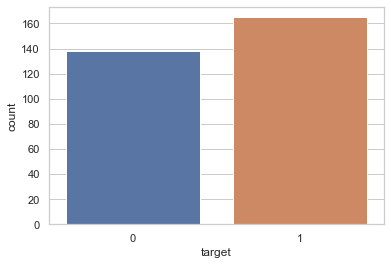

In [11]:
sns.set(style="whitegrid")
sns.countplot(x="target", data=df)

### Comment 
1. Their are 165 positive classes and 138 negative class i.e. not suffering heart disease.
2. Data is Somewhat balanced data.

### 3. Frequency distribution of variable with respect to other variable

## sns.countplot()

sns.countplot(
    **x** = None,
    **y** = None,
    **hue** = None,
    **data** = None,
    **order**= None,
    **hue_order** = None, 
    **orient** = None,
    **color** = None,
    **palette** = None,
    **saturation** = 0.75,
    **dodge** = True,
    **ax** = None,
)

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those

Parameters
----------
**x, y, hue** : names of variables in ``data`` or vector data, optional
     - Any one of x and y is specified x for vertical plot and y for horizontal.
     - Hue is used for fruency distribution of variable with respect to other variable. that other vwaariable is given to hue.
    
**data** : DataFrame, array, or list of arrays, optional
    Dataset for plotting. 
    
**order, hue_order** : lists of strings, optional
    Order to plot the categorical levels in, otherwise the levels are inferred from the data objects. 

**orient** : "v" | "h", optional
    Orientation of the plot (vertical or horizontal). This is usually inferred based on the type of the input variables, but it can be used to resolve ambiguitiy when both `x` and `y` are numeric or when plotting wide-form data.    

**color** : matplotlib color, optional
    Color for all of the elements, or seed for a gradient palette.    

**palette** : palette name, list, or dict
    Colors to use for the different levels of the ``hue`` variable. Should
    be something that can be interpreted by :func:`color_palette`, or a
    dictionary mapping hue levels to matplotlib colors.    

**saturation** : float, optional
    Proportion of the original saturation to draw colors at. Large patches
    often look better with slightly desaturated colors, but set this to
    ``1`` if you want the plot colors to perfectly match the input color
    spec.    

**dodge** : bool, optional
    When hue nesting is used, whether elements should be shifted along the categorical axis.    

**ax** : matplotlib Axes, optional
    Axes object to draw the plot onto, otherwise uses the current Axes.    
kwargs : key, value mappings
    Other keyword arguments are passed through to
    :meth:`matplotlib.axes.Axes.bar`.

In [14]:
df.groupby("sex")["target"].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

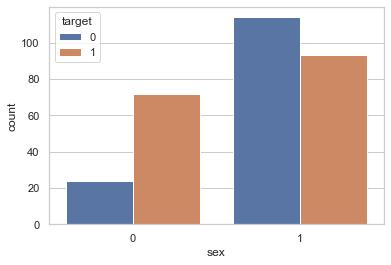

In [29]:
sns.countplot(x="sex",hue="target" ,data=df)

### Alternate approach

## sns.catplot()

sns.catplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    row=None,
    col=None,
    col_wrap=None,
    estimator=<function mean at 0x000002C5FE264EE0>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    kind='strip',
    height=5,
    aspect=1,
    orient=None,
    color=None,
    palette=None,
    legend=True,
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The ``kind``
parameter selects the underlying axes-level function to use:

Categorical scatterplots:

- :func:`stripplot` (with ``kind="strip"``; the default)
- :func:`swarmplot` (with ``kind="swarm"``)

Categorical distribution plots:

- :func:`boxplot` (with ``kind="box"``)
- :func:`violinplot` (with ``kind="violin"``)
- :func:`boxenplot` (with ``kind="boxen"``)

Categorical estimate plots:

- :func:`pointplot` (with ``kind="point"``)
- :func:`barplot` (with ``kind="bar"``)
- :func:`countplot` (with ``kind="count"``)

Extra keyword arguments are passed to the underlying function, so you
should refer to the documentation for each to see kind-specific options.

Note that unlike when using the axes-level functions directly, data must be
passed in a long-form DataFrame with variables specified by passing strings
to ``x``, ``y``, ``hue``, etc.

As in the case with the underlying plot functions, if variables have a
``categorical`` data type, the levels of the categorical variables, and
their order will be inferred from the objects. Otherwise you may have to
use alter the dataframe sorting or use the function parameters (``orient``,
``order``, ``hue_order``, etc.) to set up the plot correctly.

This function always treats one of the variables as categorical and
draws data at ordinal positions (0, 1, ... n) on the relevant axis, even
when the data has a numeric or date type.

See the :ref:`tutorial <categorical_tutorial>` for more information.    

After plotting, the :class:`FacetGrid` with the plot is returned and can
be used directly to tweak supporting plot details or add other layers.

Parameters
----------
**x, y, hue** : names of variables in ``data``
    Inputs for plotting long-form data. See examples for interpretation.        
**data** : DataFrame
    Long-form (tidy) dataset for plotting. Each column should correspond
    to a variable, and each row should correspond to an observation.    

**row, col** : names of variables in ``data``, optional
    Categorical variables that will determine the faceting of the grid.

**col_wrap** : int
    "Wrap" the column variable at this width, so that the column facets
    span multiple rows. Incompatible with a ``row`` facet.    

**estimator** : callable that maps vector -> scalar, optional
    Statistical function to estimate within each categorical bin.

**ci** : float or "sd" or None, optional
    Size of confidence intervals to draw around estimated values.  If
    "sd", skip bootstrapping and draw the standard deviation of the
    observations. If ``None``, no bootstrapping will be performed, and
    error bars will not be drawn.

**n_boot** : int, optional
    Number of bootstrap iterations to use when computing confidence
    intervals.

**units** : name of variable in ``data`` or vector data, optional
    Identifier of sampling units, which will be used to perform a
    multilevel bootstrap and account for repeated measures design.

**seed** : int, numpy.random.Generator, or numpy.random.RandomState, optional
    Seed or random number generator for reproducible bootstrapping.    

**order, hue_order** : lists of strings, optional
    Order to plot the categorical levels in, otherwise the levels are
    inferred from the data objects.        

**row_order, col_order** : lists of strings, optional
    Order to organize the rows and/or columns of the grid in, otherwise the
    orders are inferred from the data objects.

**kind** : str, optional
    The kind of plot to draw, corresponds to the name of a categorical
    axes-level plotting function. Options are: "strip", "swarm", "box", "violin",
    "boxen", "point", "bar", or "count".

**height** : scalar
    Height (in inches) of each facet. See also: ``aspect``.    

**aspect** : scalar
    Aspect ratio of each facet, so that ``aspect * height`` gives the width
    of each facet in inches.    

**orient** : "v" | "h", optional
    Orientation of the plot (vertical or horizontal). This is usually
    inferred based on the type of the input variables, but it can be used
    to resolve ambiguitiy when both `x` and `y` are numeric or when
    plotting wide-form data.    

**color** : matplotlib color, optional
    Color for all of the elements, or seed for a gradient palette.    
palette : palette name, list, or dict
    Colors to use for the different levels of the ``hue`` variable. Should
    be something that can be interpreted by :func:`color_palette`, or a
    dictionary mapping hue levels to matplotlib colors.    

**legend** : bool, optional
    If ``True`` and there is a ``hue`` variable, draw a legend on the plot.

**legend_out** : bool
    If ``True``, the figure size will be extended, and the legend will be
    drawn outside the plot on the center right.    

**share{x,y}** : bool, 'col', or 'row' optional
    If true, the facets will share y axes across columns and/or x axes
    across rows.    

**margin_titles** : bool
    If ``True``, the titles for the row variable are drawn to the right of
    the last column. This option is experimental and may not work in all
    cases.    

**facet_kws** : dict, optional
    Dictionary of other keyword arguments to pass to :class:`FacetGrid`.

**kwargs** : key, value pairings
    Other keyword arguments are passed through to the underlying plotting
    function

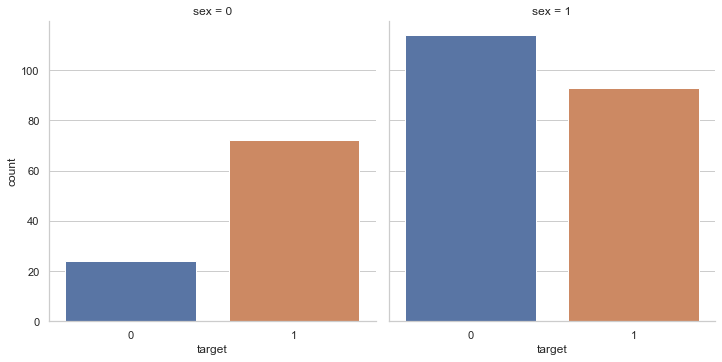

In [33]:
sns.catplot(x="target", col="sex", data=df, kind="count", height=5, aspect=1)

### Comment -

- We can see that the values of target variable are plotted wrt sex : (1 = male; 0 = female).

- target variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- The above plot confirms our findings that -

    - Out of 96 females - 72 have heart disease and 24 do not have heart disease.

    - Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.